<a href="https://colab.research.google.com/github/NailiaSab/git-bacicss/blob/main/keras_training_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика по обучению моделей

В этом практическом задании мы закрепим на практике как обучать модели в tensorflow на синтетических данных. В задачах ниже необходимо получить точность выше 90%. Советуем не сдаваться на этом -- везде реально получить 100%. А в последнем задании можно получить бонусные баллы за модель с минимальным количеством параметров.

In [2]:
import tensorflow as tf
import numpy as np
#tf.enable_eager_execution()
print(tf.__version__)

2.17.0


In [3]:
#@title
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize
from sklearn.metrics import accuracy_score


%matplotlib inline
np.random.seed(10)

colors = ['red', "blue"]
labels_cmap = ListedColormap(colors, 2)
colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
main_cmap = LinearSegmentedColormap.from_list("main_scheme", colors, N=300)

def show_data(X, y):
    plt.figure(figsize=(5, 5))
    plt.scatter(X[:, 0], X[:, 1], s=120, color=labels_cmap(y))


def show_descision_boundary(clf, limits, binary=False, X=None, y=None, n_lines=10, show_lines=False,
                           figsize=(5, 5), ax=None):
    if limits is None:
        if X is not None:
            xs = [X[:, 0].min() - .3, X[:, 0].max() + .3]
            ys = [X[:, 1].min() - .3, X[:, 1].max() + .3]
        else:
            xs = [-1, 1]
            ys = [-1, 1]
    else:
        xs, ys = limits

    x_min, x_max = xs
    y_min, y_max = ys

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(1, 1, 1)

    if binary:
        Z = clf.predict(np.c_[xx.ravel(), xx.ravel()])
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        norm = Normalize(vmin=0.,vmax=1.)
    else:
        Z = clf(np.c_[xx.ravel(), xx.ravel()])
        Z = clf(np.c_[xx.ravel(), yy.ravel()])
        #if clf.prob_output:
        #    norm = Normalize(vmin=0.,vmax=1.)
        #else:
        norm = Normalize(vmin=-10.,vmax=10., clip=True)
        Z = Z.numpy()

    Z = Z.reshape(xx.shape)
    Z = Z.astype(np.float32)

    ax.contourf(xx, yy, Z, n_lines, alpha=0.4, cmap=main_cmap, norm=norm)
    if show_lines:
        cp = ax.contour(xx, yy, Z, n_lines)
        ax.clabel(cp, inline=True,
              fontsize=10, colors="green")

    if y is not None:
        X = np.array(X)
        y = np.array(y)
        ax.scatter(X[:, 0], X[:, 1], s=120, color=labels_cmap(y),
                   zorder=4)


def eval_model(model, X, y):
    accuracy = model.evaluate(X, y)[1]
    if accuracy == 1.0:
        print("Perfect!")
    elif  accuracy > 0.9:
        print("Well done! Can you make 100%?")
    else:
        print("Don't give up!")
    return accuracy

**1a**. Начнем с классической задачи -- XOR.

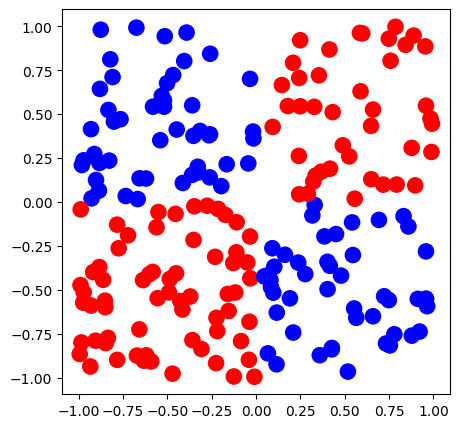

In [16]:
X = np.random.rand(200, 2) - 0.5
y = ((X[:, 0] < 0) ^ (X[:, 1] < 0))
X = X*2
show_data(X, y)

In [17]:
model = tf.keras.Sequential()
# <YOUR CODE STARTS HERE>
# 1. добавьте скрытые слои в модель (в первом из них не забудьте про input_shape)
#    ~3 скрытых слоев достаточно
# 2. добавьте выходной слой он должен быть без активации
# 3. определите оптимизатор
# 4. определите лосс (не забудьте указать from_logits=True!!)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(2,),activation="relu"))
model.add(tf.keras.layers.Dense(6,activation="relu"))
model.add(tf.keras.layers.Dense(6,activation="relu"))
model.add(tf.keras.layers.Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)







# <YOUR CODE ENDS HERE>

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
history = model.fit(X, y, epochs=200, verbose=1, batch_size=64, shuffle=True)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5496 - loss: 0.7125
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5126 - loss: 0.6875 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5074 - loss: 0.6658 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6833 - loss: 0.6274 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6999 - loss: 0.5544 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7393 - loss: 0.5335 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7894 - loss: 0.4360 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7994 - loss: 0.3714 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8618 - loss: 0.3169 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8589 - loss: 0.3085 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9149 - loss: 0.2455 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9383 - loss

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.9653e-04  
Perfect!


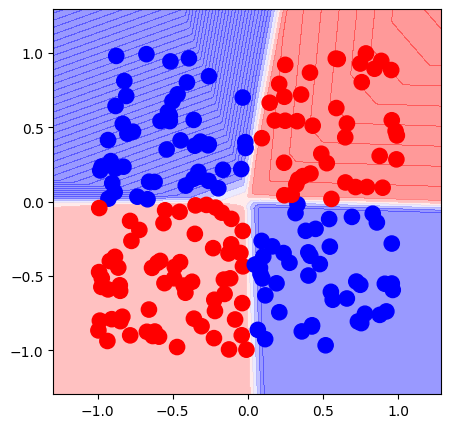

In [18]:
limits = [[-0.6, 0.6], [-0.6, 0.6]]
eval_model(model, X, y)
show_descision_boundary(limits=None, clf=model, binary=False,
                                X=X,
                                y=y,
                                n_lines=50,
                                show_lines=False)

**1b**

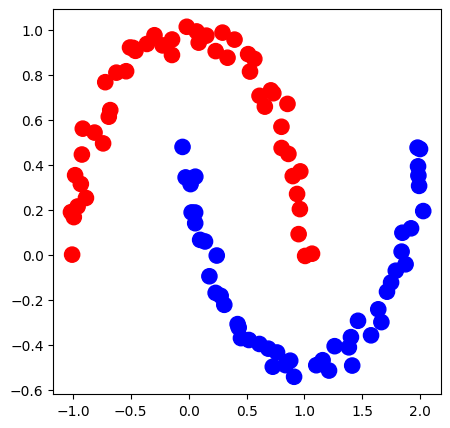

In [19]:
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.04)
show_data(X, y)

In [20]:
model = tf.keras.Sequential()
# <YOUR CODE STARTS HERE>
# 1. добавьте скрытые слои в модель (в первом из них не забудьте про input_shape)
#    ~3 скрытых слоев достаточно
# 2. добавьте выходной слой он должен быть без активации
# 3. определите оптимизатор
# 4. определите лосс (не забудьте указать from_logits=True!!)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(2,),activation="sigmoid"))
model.add(tf.keras.layers.Dense(6,activation="sigmoid"))
model.add(tf.keras.layers.Dense(6,activation="sigmoid"))
model.add(tf.keras.layers.Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.2)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)








# <YOUR CODE ENDS HERE>

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
history = model.fit(X, y, epochs=200, verbose=1, batch_size=64, shuffle=True)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4815 - loss: 0.7577
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4258 - loss: 0.7514 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4688 - loss: 0.6980 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5052 - loss: 0.6825 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4948 - loss: 0.6589 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4948 - loss: 0.6190 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8160 - loss: 0.5726 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8190 - loss: 0.5077 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8227 - loss: 0.4403 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8465 - loss: 0.3949 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8598 - loss: 0.3557 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8665 - loss

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.5126e-04  
Perfect!


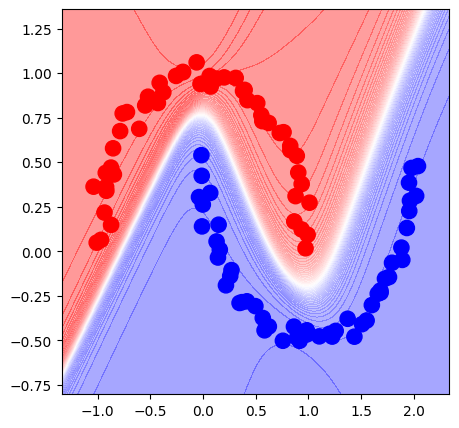

In [19]:
eval_model(model, X, y)
show_descision_boundary(limits=None, clf=model, binary=False,
                                X=X,
                                y=y,
                                n_lines=50,
                                show_lines=False)

**1c**

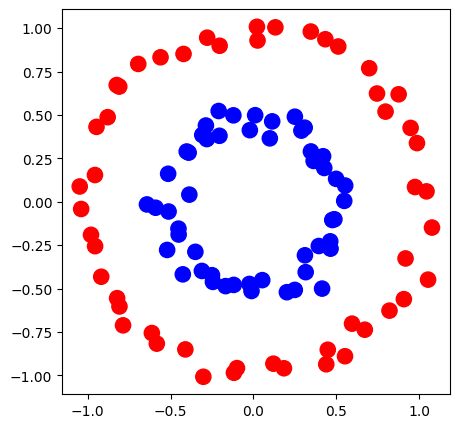

In [21]:
from sklearn.datasets import make_circles

X, y = make_circles(factor=0.5, noise=0.05)
show_data(X, y)

In [26]:
model = tf.keras.Sequential()
# <YOUR CODE STARTS HERE>
# 1. добавьте скрытые слои в модель (в первом из них не забудьте про input_shape)
#    Постарайтесь сделать количество слоев и нейронов минимальным.
# 2. добавьте выходной слой он должен быть без активации
# 3. определите оптимизатор
# 4. определите лосс (не забудьте указать from_logits=True!!)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(6, input_shape=(2,),activation="relu"))
model.add(tf.keras.layers.Dense(6,activation="relu"))
model.add(tf.keras.layers.Dense(6,activation="relu"))
model.add(tf.keras.layers.Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)








# <YOUR CODE ENDS HERE>

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
history = model.fit(X, y, epochs=200, verbose=1, batch_size=64, shuffle=True)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4896 - loss: 0.6722
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4896 - loss: 0.5917
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4896 - loss: 0.5393
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5415 - loss: 0.3910
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8665 - loss: 0.2960 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9525 - loss: 0.2298 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9577 - loss: 0.1901
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9815 - loss: 0.1495
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9815 - loss: 0.1279
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.1127 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0851
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9881 - lo

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.8535e-04  
Perfect!
Model has 109 parameters


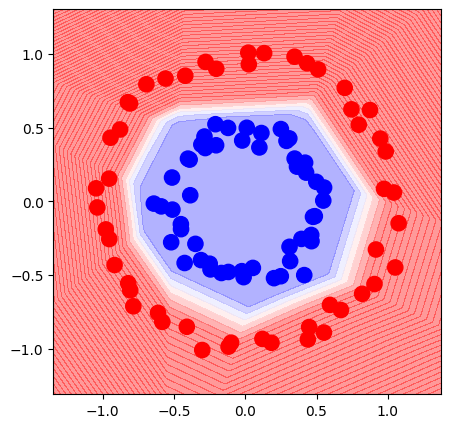

In [27]:
accuracy = eval_model(model, X, y)
if model.count_params() < 18 and accuracy == 1.0:
    print("Bonus points!")
else:
    print(f"Model has {model.count_params()} parameters")

show_descision_boundary(limits=None, clf=model, binary=False,
                                X=X,
                                y=y,
                                n_lines=50,
                                show_lines=False)